In [1]:
# Importing dependancies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
# Importing primary csv for data generation
df = pd.read_csv("Output/drug-overdose_region.csv")
reg_pivot = pd.DataFrame(df).set_index("Subject")
reg_pivot

,1,2,3,4
Subject,,,,
Cocaine (T40.5),28465.0,25611.0,23322.0,3361.0
Heroin (T40.1),30446.0,29933.0,24580.0,9153.0
"Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)",75698.0,64572.0,75752.0,18440.0
Number of Deaths,5967066.0,7023764.0,12094654.0,6006006.0
Number of Drug Overdose Deaths,193993.0,180124.0,270516.0,124627.0
Psychostimulants with abuse potential (T43.6),3774.0,8039.0,14732.0,14288.0
Alcohol,4785.0,7338.0,12037.0,11664.0
Drug Arrests,228158.0,201279.0,552370.0,321451.0
Homeless Population,139271.0,58663.0,122074.0,201342.0


In [3]:
# Importing Census csv for data generation
census_df = pd.read_csv("Output/census_df_complete.csv")
census_df = census_df.set_index(["Subject"])
census_df

,1,2,3,4
Subject,,,,
Total population,"56,470,581","68,179,351","123,658,624","77,410,622"
Median household income (dollars),"66,998","57,778","55,135","66,485"
No health insurance coverage,5.6%,6.5%,12.0%,7.7%
Poplulation Poverty Rate,12.0%,12.7%,14.7%,12.9%
Number of Drug Overdose Deaths,193993.0,180124.0,270516.0,124627.0


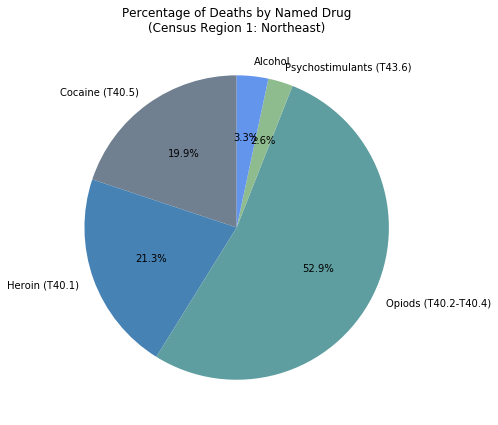

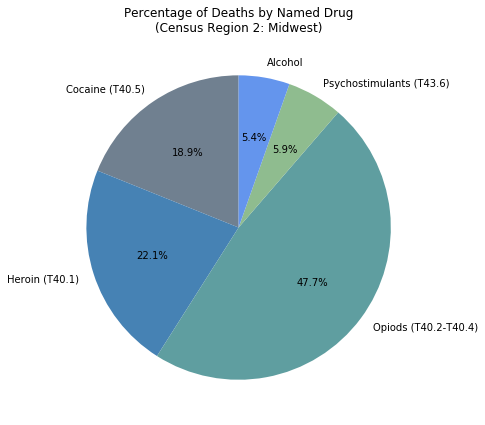

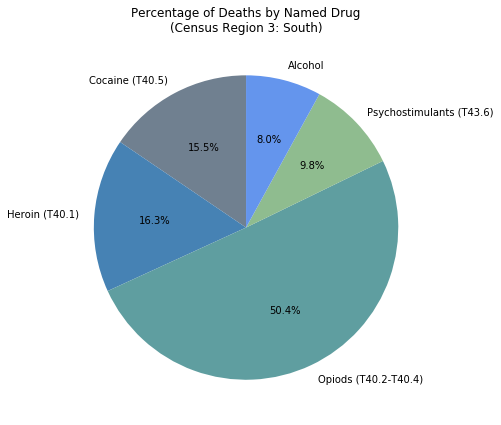

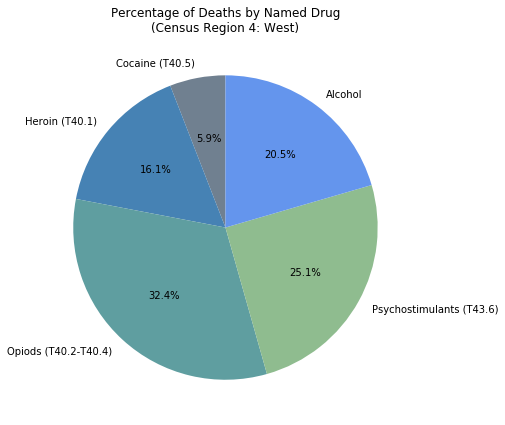

In [4]:
named_drugs_reg = reg_pivot.drop(["Number of Deaths", "Number of Drug Overdose Deaths","Drug Arrests","Homeless Population"])
named_drugs_reg = named_drugs_reg.rename({"Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)":"Opiods (T40.2-T40.4)",
                                          "Psychostimulants with abuse potential (T43.6)": "Psychostimulants (T43.6)"})

# Data to plot
labels = named_drugs_reg.index
named_deaths_ax1_sizes = named_drugs_reg["1"]
named_deaths_ax2_sizes = named_drugs_reg["2"]
named_deaths_ax3_sizes = named_drugs_reg["3"]
named_deaths_ax4_sizes = named_drugs_reg["4"]
colors = ["slategray", "steelblue", "cadetblue", "darkseagreen", "cornflowerblue"]

# Plot Census Region 1
fig1, named_deaths_ax1 = plt.subplots(figsize=(8, 7))
named_deaths_ax1.pie(named_deaths_ax1_sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
named_deaths_ax1.set(aspect="equal", title="Percentage of Deaths by Named Drug\n(Census Region 1: Northeast)")

plt.savefig("Output/per_drug/per_drug_1")
plt.show()

#Plot Census Region 2
fig2, named_deaths_ax2 = plt.subplots(figsize=(8, 7))
named_deaths_ax2.pie(named_deaths_ax2_sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
named_deaths_ax2.set(aspect="equal", title="Percentage of Deaths by Named Drug\n(Census Region 2: Midwest)")

plt.savefig("Output/per_drug/per_drug_2")
plt.show()

#Plot Census Region 3
fig3, named_deaths_ax3 = plt.subplots(figsize=(8, 7))
named_deaths_ax3.pie(named_deaths_ax3_sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
named_deaths_ax3.set(aspect="equal", title="Percentage of Deaths by Named Drug\n(Census Region 3: South)")

plt.savefig("Output/per_drug/per_drug_3")
plt.show()

#Plot Census Region 3
fig4, named_deaths_ax4 = plt.subplots(figsize=(8, 7))
named_deaths_ax4.pie(named_deaths_ax4_sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
named_deaths_ax4.set(aspect="equal", title="Percentage of Deaths by Named Drug\n(Census Region 4: West)")

plt.savefig("Output/per_drug/per_drug_4")
plt.show()

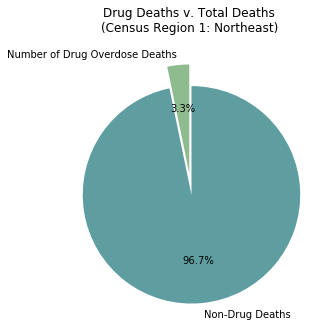

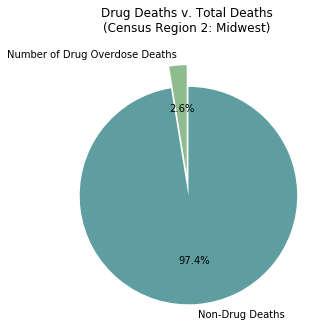

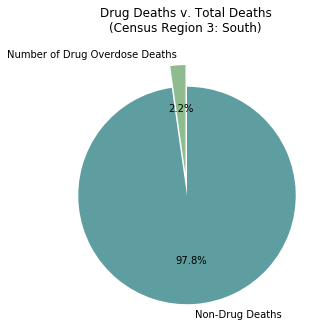

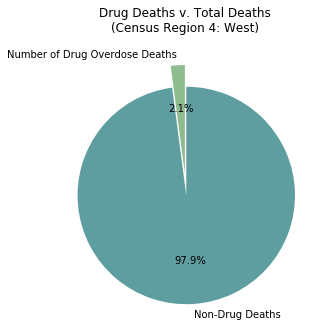

In [5]:
total_death_reg = reg_pivot.drop(["Drug Arrests", "Alcohol","Homeless Population",
                                  "Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)",
                                  "Psychostimulants with abuse potential (T43.6)","Cocaine (T40.5)","Heroin (T40.1)"])
total_death_reg = total_death_reg.append(pd.Series(name="Non-Drug Deaths"))
total_death_reg.loc["Non-Drug Deaths"] = total_death_reg.loc["Number of Deaths"] - total_death_reg.loc["Number of Drug Overdose Deaths"]
# total_death_reg = total_death_reg.rename({"Number of Drug Overdose Deaths": "Drug Overdose Deaths"})
total_death_reg = total_death_reg.drop("Number of Deaths")

# Data to plot
labels = total_death_reg.index
death_ax1_sizes = total_death_reg["1"]
death_ax2_sizes = total_death_reg["2"]
death_ax3_sizes = total_death_reg["3"]
death_ax4_sizes = total_death_reg["4"]
colors = ["darkseagreen","cadetblue"]

# Plot Census Region 1
fig1, death_ax1 = plt.subplots(figsize=(6, 5))
death_ax1.pie(death_ax1_sizes, labels=labels, colors = colors, explode = (0, 0.2), autopct='%1.1f%%', startangle=90)
death_ax1.set(aspect="equal", title="Drug Deaths v. Total Deaths\n(Census Region 1: Northeast)")

plt.savefig("Output/death_totals/death_tot_1")
plt.show()

#Plot Census Region 2
fig2, death_ax2 = plt.subplots(figsize=(6, 5))
death_ax2.pie(death_ax2_sizes, labels=labels, colors = colors, explode = (0, 0.2), autopct='%1.1f%%', startangle=90)
death_ax2.set(aspect="equal", title="Drug Deaths v. Total Deaths\n(Census Region 2: Midwest)")

plt.savefig("Output/death_totals/death_tot_2")
plt.show()

#Plot Census Region 3
fig3, death_ax3 = plt.subplots(figsize=(6, 5))
death_ax3.pie(death_ax3_sizes, labels=labels, colors = colors, explode = (0, 0.2), autopct='%1.1f%%', startangle=90)
death_ax3.set(aspect="equal", title="Drug Deaths v. Total Deaths\n(Census Region 3: South)")

plt.savefig("Output/death_totals/death_tot_3")
plt.show()

#Plot Census Region 3
fig4, death_ax4 = plt.subplots(figsize=(6, 5))
death_ax4.pie(death_ax4_sizes, labels=labels, colors = colors, explode = (0, 0.2), autopct='%1.1f%%', startangle=90)
death_ax4.set(aspect="equal", title="Drug Deaths v. Total Deaths\n(Census Region 4: West)")

plt.savefig("Output/death_totals/death_tot_4")
plt.show()


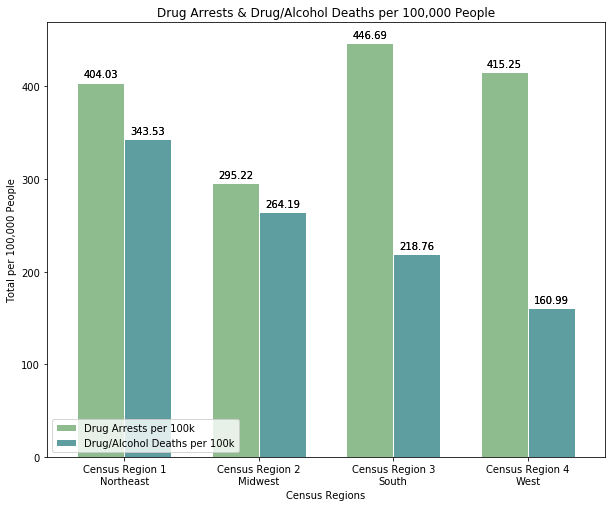

In [8]:
# Combine arrests, overdoses, and population data to get per capita data
tot_arrest_reg = reg_pivot.loc["Drug Arrests"]
tot_overdose_reg = reg_pivot.loc["Number of Drug Overdose Deaths"]
tot_pop_reg = census_df.loc["Total population"]
tot_pop_reg = pd.to_numeric(tot_pop_reg.str.replace(',',''), errors='coerce')
arrest_overdose_pop = pd.DataFrame([tot_arrest_reg, tot_overdose_reg, tot_pop_reg])

#Calculate per capita data
arrest_overdose_pop.loc["Arrests Per 100,000 People"] = ((arrest_overdose_pop.loc["Drug Arrests"] / arrest_overdose_pop.loc["Total population"])*100000)
arrest_overdose_pop.loc["Drug Deaths Per 100,000 People"] = ((arrest_overdose_pop.loc["Number of Drug Overdose Deaths"] / arrest_overdose_pop.loc["Total population"])*100000)
arrest_v_overdose = arrest_overdose_pop.drop({"Drug Arrests","Total population", "Number of Drug Overdose Deaths"}) 
arrest_v_overdose = arrest_v_overdose.round(2)

# Data to plot
width = .35
x_axis1 = np.arange(len(arrest_v_overdose.columns))
x_axis2 = [x + (width) for x in x_axis1]
arrests = arrest_v_overdose.iloc[0]
overdose = arrest_v_overdose.iloc[1]
arrest_vals = arrests[1].tolist()
overdose_vals = overdose[1].tolist()
regions = ["Census Region 1\nNortheast", "Census Region 2\nMidwest", "Census Region 3\nSouth", "Census Region 4\nWest"]

# # Create figure where data will be plotted
fig1, arrests_ax1 = plt.subplots(figsize=(10, 8))

# Pull in both data series
p1 = arrests_ax1.bar(x_axis1, arrests, width, color="darkseagreen", edgecolor='white', label = "Drug Arrests per 100k")
p2 = arrests_ax1.bar(x_axis2, overdose, width, color="cadetblue", edgecolor='white', label = "Drug/Alcohol Deaths per 100k")

# Format chart
arrests_ax1.set(title="Drug Arrests & Drug/Alcohol Deaths per 100,000 People")
tick_locations = [value + (width/2) for value in x_axis1]
plt.xticks(tick_locations, regions)
plt.xlim(-0.40, len(x_axis1)-.25)
plt.xlabel("Census Regions")
plt.ylabel("Total per 100,000 People")
plt.legend(loc="lower left")

#Add data label label above each bar
def autolabel(rects):

    for rect in p1:
        height = rect.get_height()
        arrests_ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    for rect in p2:
        height = rect.get_height()
        arrests_ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(arrest_vals)
autolabel(overdose_vals)
plt.savefig("Output/vs_death_bars/arrests")

In [ ]:
arrests_obs = np.array([[arrests],[overdose]])
chi2_contingency(arrests_obs)

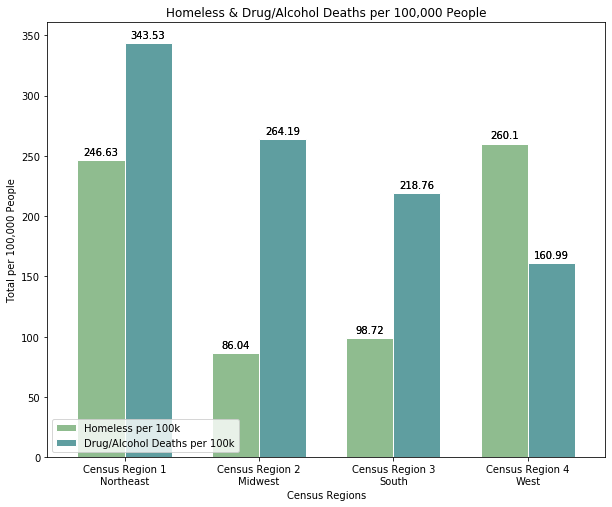

In [9]:
# Combine homeless, overdoses, and population data to get per capita data
tot_homeless_pop_reg = reg_pivot.loc["Homeless Population"]
tot_overdose_reg = reg_pivot.loc["Number of Drug Overdose Deaths"]
tot_pop_reg = census_df.loc["Total population"]
tot_pop_reg = pd.to_numeric(tot_pop_reg.str.replace(',',''), errors='coerce')
homeless_overdose_pop = pd.DataFrame([tot_homeless_pop_reg, tot_overdose_reg, tot_pop_reg])

#Calculate per capita data
homeless_overdose_pop.loc["Homeless Per 100,000 People"] = ((homeless_overdose_pop.loc["Homeless Population"] / homeless_overdose_pop.loc["Total population"])*100000)
homeless_overdose_pop.loc["Drug Deaths Per 100,000 People"] = ((homeless_overdose_pop.loc["Number of Drug Overdose Deaths"] / homeless_overdose_pop.loc["Total population"])*100000)
homeless_v_overdose = homeless_overdose_pop.drop({"Homeless Population","Total population", "Number of Drug Overdose Deaths"}) 
homeless_v_overdose = homeless_v_overdose.round(2)

# Data to plot
width = .35
x_axis1 = np.arange(len(homeless_v_overdose.columns))
x_axis2 = [x + (width) for x in x_axis1]
homeless = homeless_v_overdose.iloc[0]
overdose = homeless_v_overdose.iloc[1]
homeless_vals = homeless[1].tolist()
overdose_vals = overdose[1].tolist()
regions = ["Census Region 1\nNortheast", "Census Region 2\nMidwest", "Census Region 3\nSouth", "Census Region 4\nWest"]

# # Create figure where data will be plotted
fig1, homeless_ax1 = plt.subplots(figsize=(10, 8))

# Pull in both data series
p1 = homeless_ax1.bar(x_axis1, homeless, width, color="darkseagreen", edgecolor='white', label = "Homeless per 100k")
p2 = homeless_ax1.bar(x_axis2, overdose, width, color="cadetblue", edgecolor='white', label = "Drug/Alcohol Deaths per 100k")

# Format chart
homeless_ax1.set(title="Homeless & Drug/Alcohol Deaths per 100,000 People")
tick_locations = [value + (width/2) for value in x_axis1]
plt.xticks(tick_locations, regions)
plt.xlim(-0.40, len(x_axis1)-.25)
plt.xlabel("Census Regions")
plt.ylabel("Total per 100,000 People")
plt.legend(loc="lower left")

#Add data label label above each bar
def autolabel(rects):

    for rect in p1:
        height = rect.get_height()
        homeless_ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    for rect in p2:
        height = rect.get_height()
        homeless_ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(homeless_vals)
autolabel(overdose_vals)
plt.savefig("Output/vs_death_bars/homeless")

In [ ]:
homelessness_obs = np.array([[homeless],[overdose]])
chi2_contingency(homelessness_obs)

In [ ]:
census_df = pd.read_csv(r"Output/census_df_complete.csv").set_index("Subject")
census_df = census_df.transpose()
census_df["Median household income (dollars)"] = census_df["Median household income (dollars)"].str.replace(',','').astype(np.float64)
census_df["Number of Drug Overdose Deaths"] = census_df["Number of Drug Overdose Deaths"].str.replace(',','').astype(np.float64)
census_df["Poplulation Poverty Rate"] = census_df["Poplulation Poverty Rate"].str.replace('%','').astype(np.float64)
census_df = census_df.reset_index()
census_df

In [ ]:
# # Data to plot
lab = census_df["index"]
col = ["slategray", "steelblue", "cadetblue", "darkseagreen"]
med_income = (census_df["Median household income (dollars)"])/1000
od_data = (census_df["Number of Drug Overdose Deaths"])/1000
alc_data = (reg_pivot.loc["Alcohol"])/1000

# # # Create figure where data will be plotted
fig1, income_ax1 = plt.subplots(figsize=(5, 4))

# # Pull in data series
p1 = income_ax1.scatter(od_data, med_income, marker="o", c=col, label=lab)
p2 = income_ax1.scatter(alc_data, med_income, marker="^", c="red",label=lab)
# # Format chart
income_ax1.set(title="Substance Fatalities vs. Median Household Income per 1,000 People")
plt.xlabel("Drug Fatalities (Thousands)")
plt.ylabel("Median Household Income (Thousands)")
plt.savefig("Output/vs_death_scatter/med_income")

In [ ]:
lab = census_df["index"]
col = ["slategray", "steelblue", "cadetblue", "darkseagreen"]
med_income = (census_df["Poplulation Poverty Rate"])
od_data = (census_df["Number of Drug Overdose Deaths"])/1000
alc_data = (reg_pivot.loc["Alcohol"])/1000

# # # Create figure where data will be plotted
fig1, income_ax1 = plt.subplots(figsize=(5, 4))

# # Pull in data series
p1 = income_ax1.scatter(od_data, med_income, marker="o", c=col, label=lab)
p2 = income_ax1.scatter(alc_data, med_income, marker="^", c="red",label=lab)
# # Format chart
income_ax1.set(title="Substance Fatalities vs. Poverty Rates")
plt.xlabel("Drug Fatalities (Thousands)")
plt.ylabel("Poverty Rate (Percent)")
plt.savefig("Output/vs_death_scatter/poverty")